## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.describe().T #only works on numerical features

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [6]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4705.0,12.695633,4.664849,4.555,8.645000,12.500000,16.700000,21.350000
Item_Visibility,5681.0,0.065684,0.051252,0.000,0.027047,0.054154,0.093463,0.323637
Item_MRP,5681.0,141.023273,61.809091,31.990,94.412000,141.415400,186.026600,266.588400
Outlet_Establishment_Year,5681.0,1997.828903,8.372256,1985.000,1987.000000,1999.000000,2004.000000,2009.000000


In [7]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train_data['source'] = 'training'
test_data['source'] = 'testing'
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [10]:
data = pd.concat([train_data,test_data], ignore_index = True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [11]:
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,testing
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,testing
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,testing
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,testing
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,testing


In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Those Item_Outlet_Sales derive from the fact that test_data didn't have this column so all values have been converted to nans.

### Visualization

In [13]:
import warnings
warnings.filterwarnings('ignore')

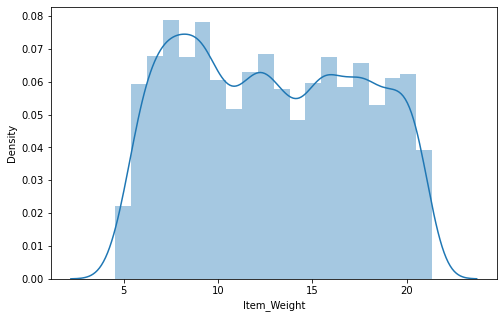

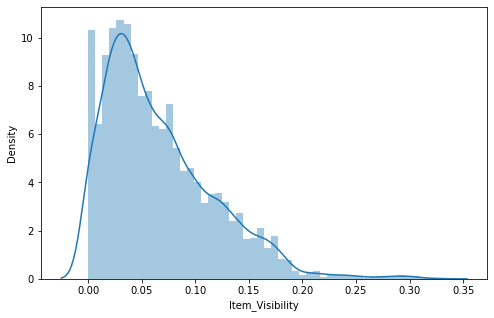

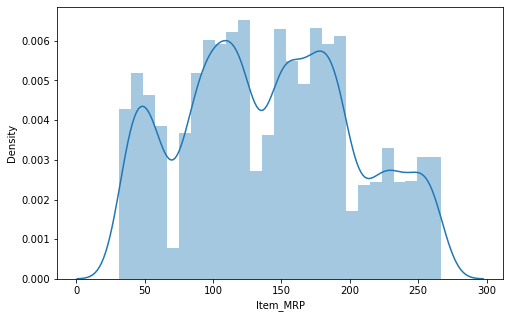

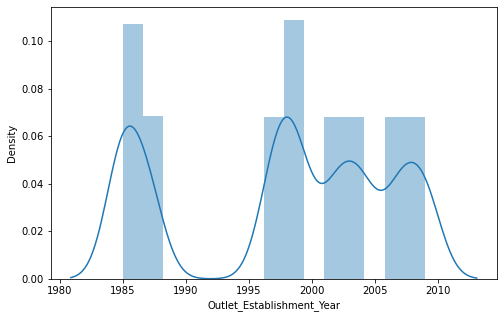

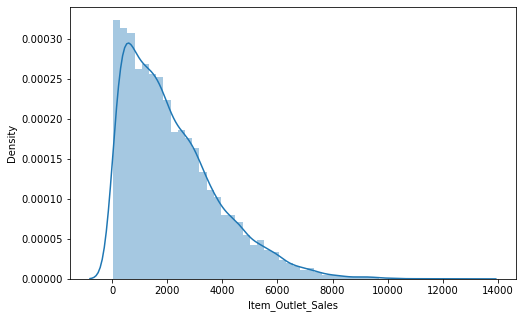

In [14]:
for i in train_data.describe().columns:
    plt.figure(figsize = (8,5))
    sns.distplot(train_data[i].dropna())

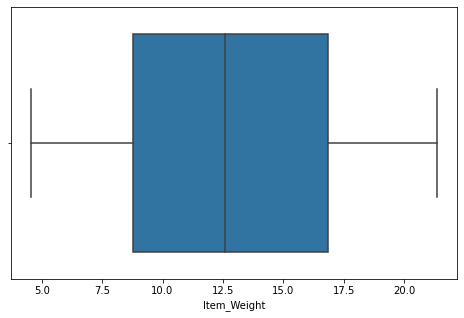

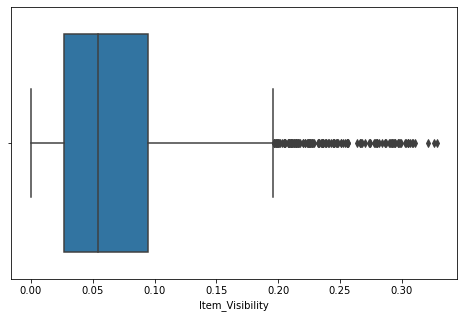

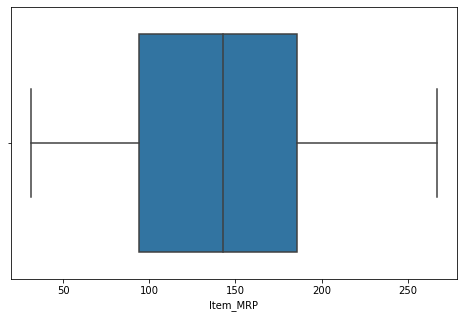

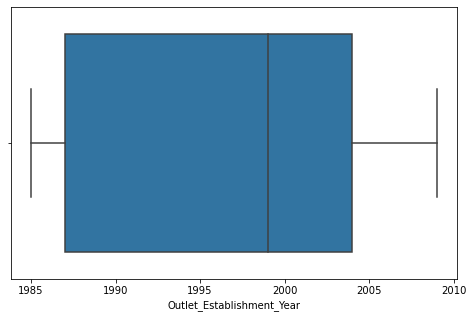

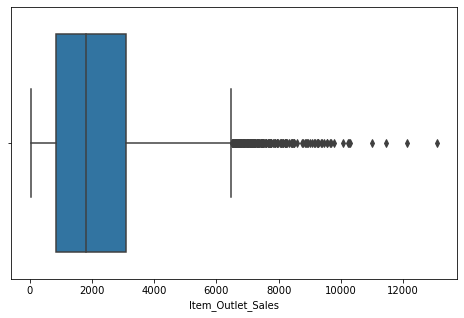

In [15]:
for i in train_data.describe().columns:
    plt.figure(figsize = (8,5))
    sns.boxplot(train_data[i].dropna())

In [16]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

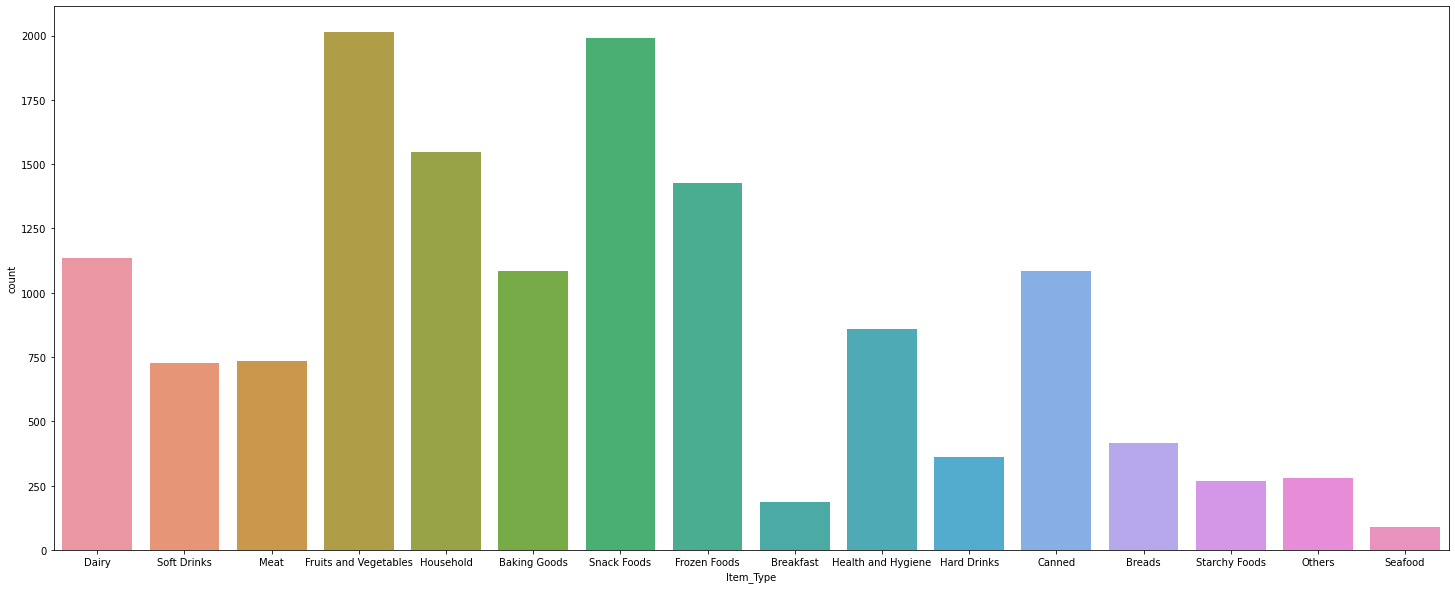

In [17]:
plt.figure(figsize = (25,10))
sns.countplot(data['Item_Type'])

In [18]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

#### Looks like Fruits and vegetables,snacks and household are in high demand

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

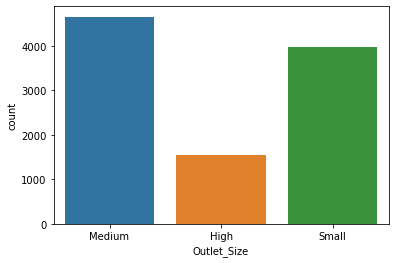

In [19]:
sns.countplot(data['Outlet_Size'])

## Medium sized outlets have the greatest success it seems

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

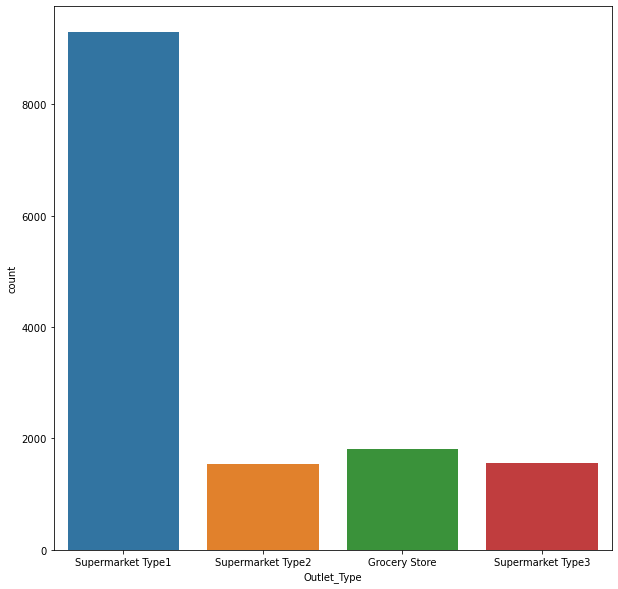

In [20]:
plt.figure(figsize = (10,10))
sns.countplot(data['Outlet_Type'])

## So, the majority of outlets are supermarket type 1

In [21]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation between the Weight of the Items and the Outlet Sales'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

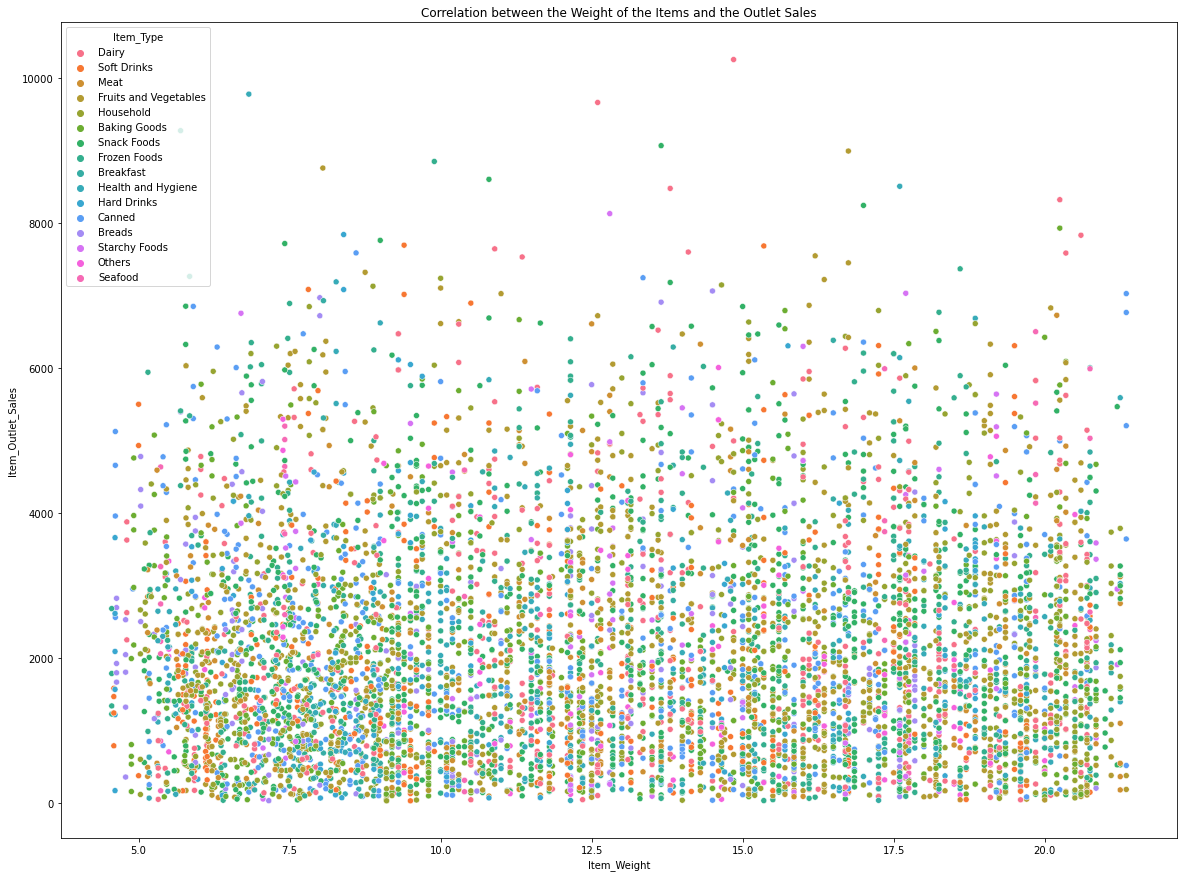

In [22]:
plt.figure(figsize = (20,15))
plt.title('Correlation between the Weight of the Items and the Outlet Sales')
sns.scatterplot(x = 'Item_Weight', y = 'Item_Outlet_Sales', hue = 'Item_Type', data = train_data)

## The weight doesn't really influence the Outlet Sale of an item

<AxesSubplot:title={'center':'Correlation between the Visibility of the Items and the Outlet Sales'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

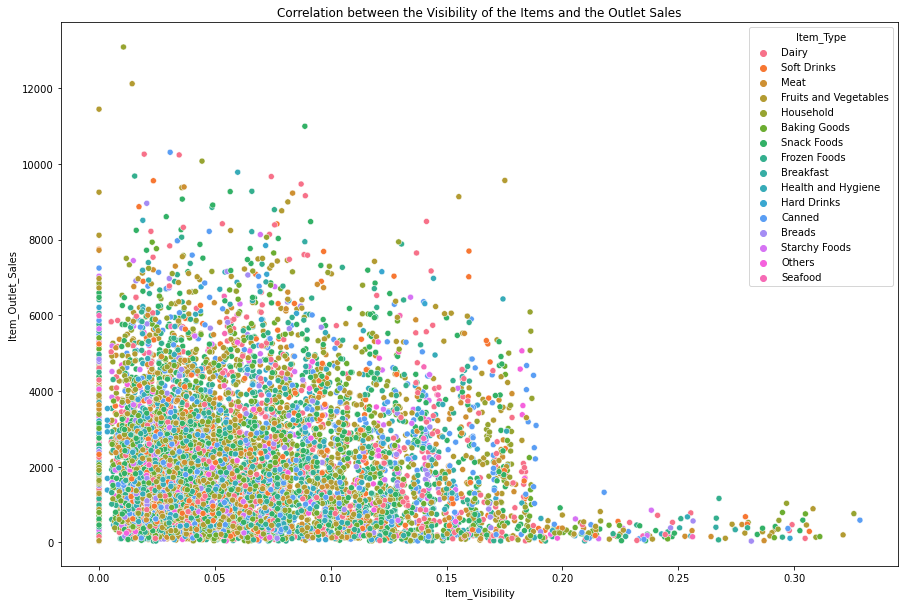

In [23]:
plt.figure(figsize = (15,10))
plt.title('Correlation between the Visibility of the Items and the Outlet Sales')
sns.scatterplot(x = 'Item_Visibility', y = 'Item_Outlet_Sales', hue = 'Item_Type', data = train_data)

## Contrary to expectation, the biggest outlet sales are when item_visibility is low.That's probably because the food items aren't visible from the entrance of the store

In [24]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

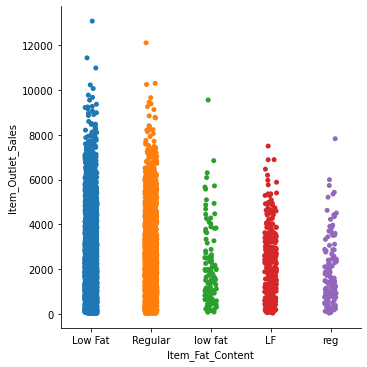

In [25]:
sns.catplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = data)

In [26]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [27]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular'})

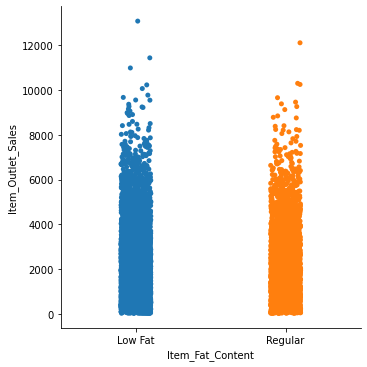

In [28]:
sns.catplot(x = 'Item_Fat_Content', y = 'Item_Outlet_Sales', data = data)

In [29]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

<AxesSubplot:>

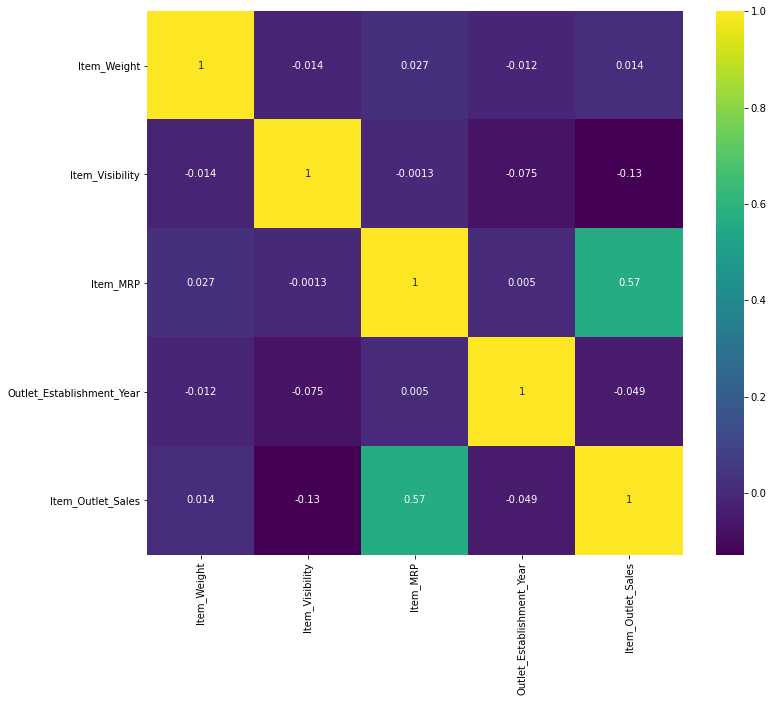

In [30]:
plt.figure(figsize = (12,10))
sns.heatmap(train_data.corr(), annot = True, cmap = 'viridis')

## Feature Engineering and Transformations

In [31]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Dealing with Item_Weight

In [32]:
meanW = data['Item_Weight'].mean()
data['Item_Weight'].fillna(meanW, inplace = True)

In [33]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Dealing with Outlet_Size

In [34]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
data['Outlet_Size'].fillna('Medium', inplace = True)

In [36]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [37]:
data['Outlet_Size'].value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

### Dealing with Item_Visibility

In [38]:
data[data['Item_Visibility'] == 0]['Item_Visibility'].value_counts()

0.0    879
Name: Item_Visibility, dtype: int64

There are 879 products with visibility 0.That's not ok, because that would mean the customers can't see them.We must adjust them.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

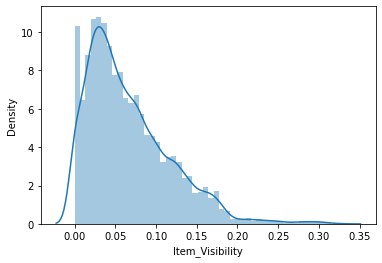

In [39]:
sns.distplot(data['Item_Visibility'])

### As we can see from the plot, the distribution is positively skewed, so it's not recommended to use the mean.
### Instead, we can use the median.

In [40]:
mean = data['Item_Visibility'].mean()

In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [42]:
for i in range(len(data['Item_Visibility'])):
    if data['Item_Visibility'][i] == 0.000000:
        data['Item_Visibility'][i] = mean
data.head()
        

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,training
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,training
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,training
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,training
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,training


In [43]:
data[data['Item_Visibility'] == 0]['Item_Visibility'].value_counts()

Series([], Name: Item_Visibility, dtype: int64)

### Dealing with Outlet_Establishment_Year

In [44]:
data['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
2004    1550
1997    1550
1999    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

So,the oldest outlet was built in 1985 and the newest in 2009.We can substract 2009 from all outlets to get the years since establishment.

In [45]:
data['Outlet_Establishment_Year'] = 2009 - data['Outlet_Establishment_Year']

In [46]:
data['Outlet_Establishment_Year'].value_counts()

24    2439
22    1553
10    1550
12    1550
5     1550
7     1548
0     1546
2     1543
11     925
Name: Outlet_Establishment_Year, dtype: int64

### Dealing with Item Types and Item Identifiers

In [47]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [48]:
data['Item_Identifier'].value_counts()

FDT34    10
FDZ16    10
NCX30    10
FDZ59    10
FDC53    10
         ..
FDH58     7
NCW54     7
FDM50     7
DRN11     7
FDS22     7
Name: Item_Identifier, Length: 1559, dtype: int64

### From here, we can assume that the first 2 letters of the item identifiers derive from the type of product:
### FD --> Food   DR --> Drink  NC --> Not Consumable

In [49]:
data['My_Better_Item_Identifiers'] = data['Item_Identifier'].apply(lambda x: x[0:2]).map({'FD' : 'Food', 'NC' : 'Non-Consumable', 'DR' : 'Drink'})

In [50]:
data['My_Better_Item_Identifiers'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: My_Better_Item_Identifiers, dtype: int64

In [51]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,My_Better_Item_Identifiers
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380,training,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228,training,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700,training,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,11,Medium,Tier 3,Grocery Store,732.3800,training,Food
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052,training,Non-Consumable


#### If a product is non-consumable, then it surely won't be having any fat so we must adjust this.

In [52]:
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [53]:
data.loc[data['My_Better_Item_Identifiers'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

## Dealing with Categorical Columns

### Label Encoder

In [54]:
from sklearn.preprocessing import LabelEncoder
labenc = LabelEncoder()

In [55]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,My_Better_Item_Identifiers
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380,training,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228,training,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700,training,Food
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,11,Medium,Tier 3,Grocery Store,732.3800,training,Food
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052,training,Non-Consumable


In [56]:
data['Outlet'] = labenc.fit_transform(data['Outlet_Identifier']) #First, we have to check out the Outlet_Identifier 
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,My_Better_Item_Identifiers,Outlet
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380,training,Food,9
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228,training,Drink,3
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700,training,Food,9
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,11,Medium,Tier 3,Grocery Store,732.3800,training,Food,0
4,NCD19,8.93,Non-Edible,0.065953,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052,training,Non-Consumable,1


In [57]:
data['Outlet'].value_counts()

5    1559
1    1553
8    1550
9    1550
6    1550
7    1548
3    1546
2    1543
0     925
4     880
Name: Outlet, dtype: int64

In [58]:
categorical_cols = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','My_Better_Item_Identifiers']
for i in categorical_cols:
    data[i] = labenc.fit_transform(data[i])
    
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,My_Better_Item_Identifiers,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,10,1,0,1,3735.1380,training,1,9
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,0,1,2,2,443.4228,training,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,10,1,0,1,2097.2700,training,1,9
3,FDX07,19.20,2,0.065953,Fruits and Vegetables,182.0950,OUT010,11,1,2,0,732.3800,training,1,0
4,NCD19,8.93,1,0.065953,Household,53.8614,OUT013,22,0,2,1,994.7052,training,2,1


In [59]:
data = pd.get_dummies(data, columns = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type','Outlet_Type','My_Better_Item_Identifiers'])
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,My_Better_Item_Identifiers_0,My_Better_Item_Identifiers_1,My_Better_Item_Identifiers_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,10,3735.1380,training,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,0,443.4228,training,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,10,2097.2700,training,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,11,732.3800,training,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,22,994.7052,training,1,...,0,0,1,0,1,0,0,0,0,1


## Model Building

In [60]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,source,Outlet,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,My_Better_Item_Identifiers_0,My_Better_Item_Identifiers_1,My_Better_Item_Identifiers_2
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,10,3735.1380,training,9,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,0,443.4228,training,3,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,10,2097.2700,training,9,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.065953,Fruits and Vegetables,182.0950,OUT010,11,732.3800,training,0,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.065953,Household,53.8614,OUT013,22,994.7052,training,1,...,0,0,1,0,1,0,0,0,0,1


In [61]:
data.drop(['Item_Identifier'], axis = 1, inplace = True)

In [62]:
train = data.loc[data['source'] == 'training']
test = data.loc[data['source'] == 'testing']

In [63]:
train.drop(['source'], axis = 1, inplace = True)
test.drop(['source', 'Item_Outlet_Sales'], axis = 1, inplace = True)

In [64]:
train.dtypes

Item_Weight                     float64
Item_Visibility                 float64
Item_Type                        object
Item_MRP                        float64
Outlet_Identifier                object
Outlet_Establishment_Year         int64
Item_Outlet_Sales               float64
Outlet                            int32
Item_Fat_Content_0                uint8
Item_Fat_Content_1                uint8
Item_Fat_Content_2                uint8
Outlet_Size_0                     uint8
Outlet_Size_1                     uint8
Outlet_Size_2                     uint8
Outlet_Location_Type_0            uint8
Outlet_Location_Type_1            uint8
Outlet_Location_Type_2            uint8
Outlet_Type_0                     uint8
Outlet_Type_1                     uint8
Outlet_Type_2                     uint8
Outlet_Type_3                     uint8
My_Better_Item_Identifiers_0      uint8
My_Better_Item_Identifiers_1      uint8
My_Better_Item_Identifiers_2      uint8
dtype: object

In [65]:
X_train = train.drop(['Item_Type','Outlet_Identifier','Item_Outlet_Sales'], axis = 1)
y_train = train['Item_Outlet_Sales']

In [66]:
X_test = test.drop(['Item_Type','Outlet_Identifier'], axis = 1)

In [67]:
X_test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Size_0,Outlet_Size_1,...,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,My_Better_Item_Identifiers_0,My_Better_Item_Identifiers_1,My_Better_Item_Identifiers_2
8523,20.750000,0.007565,107.8622,10,9,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
8524,8.300000,0.038428,87.3198,2,2,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
8525,14.600000,0.099575,241.7538,11,0,0,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
8526,7.315000,0.015388,155.0340,2,2,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
8527,12.792854,0.118599,234.2300,24,5,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0


## Linear Regression Model

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [69]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [70]:
print('Accuracy of Linear Regression  is: {}%'.format(linreg.score(X_train,y_train) * 100))

Accuracy of Linear Regression  is: 56.34816946202636%


In [92]:
linpredict = pd.DataFrame(linreg.predict(X_test))
linpredict

,0
0,1844.278223
1,1572.701747
2,1875.193002
3,2590.486397
4,5183.315423
...,...
5676,2313.564476
5677,2441.098816
5678,1811.064805
5679,3542.400750


## XGBoost Regressor Model

In [71]:
from xgboost import XGBRegressor

In [72]:
model = XGBRegressor(n_estimators = 1000, learning_rate = 0.05)
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=20, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
print('Accuracy of XGBoost Regressor  is: {}%'.format(model.score(X_train,y_train) * 100))

Accuracy of XGBoost Regressor  is: 87.05199643914017%


In [74]:
XGBPredictions = pd.DataFrame(model.predict(X_test))
XGBPredictions

,0
0,1549.832642
1,1398.670166
2,1345.650391
3,3191.288086
4,5694.944336
...,...
5676,2568.449463
5677,2795.380371
5678,1775.802002
5679,3848.364502


## SVM with GridSearchCV

In [117]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV




parameters = { 'C': [0.001,0.01,0.1,1, 10],  
   'gamma': [0.1, 0.01,1] }
     

In [118]:
model1 = svm.SVR(kernel = 'rbf')
model2 = GridSearchCV(model1, cv = 5, param_grid = parameters, verbose = 5, n_jobs = -1)
model2.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 0.01, 1]},
             verbose=5)

In [119]:
print('SVM accuracy: {}%'.format(model2.score(X_train,y_train) * 100))

SVM accuracy: 23.218056117568853%


### now that's a horrendous score, but then again svm usually performs better on classification tasks.

In [120]:
predict = pd.DataFrame(model2.predict(X_test))
predict

,0
0,1721.850210
1,1394.033779
2,2252.041119
3,2066.116821
4,2360.499781
...,...
5676,1999.590668
5677,2165.956570
5678,1806.636083
5679,2396.114786


In [121]:
ModelsPrediction = pd.concat([linpredict,XGBPredictions,predict], axis = 1)
ModelsPredictions

,Linear Regression,XGBoost,SVM with GridSearchCV
0,1844.278223,1549.832642,1721.850210
1,1572.701747,1398.670166,1394.033779
2,1875.193002,1345.650391,2252.041119
3,2590.486397,3191.288086,2066.116821
4,5183.315423,5694.944336,2360.499781
...,...,...,...
5676,2313.564476,2568.449463,1999.590668
5677,2441.098816,2795.380371,2165.956570
5678,1811.064805,1775.802002,1806.636083
5679,3542.400750,3848.364502,2396.114786


# Conclusion

### I have built three models that have different  accuracies when predicting the prices of the Big Mart products, based on various features.
### Linear Regression -----> 56.34%
### XGBoost -----> 87.05%
### SVR with GridSearchCV -----> 23.21%

### Without a doubt my most efficient model was the XGBoost